# **공통 라이브러리 및 드라이브 연동**

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import math
import cv2

In [10]:
from google.colab import drive
drive.mount('/content/drive')
impath = '/content/drive/My Drive/Colab_Notebooks/Image_processing/image/lena.bmp'
impath2 = '/content/drive/My Drive/Colab_Notebooks/Image_processing/image/house.bmp'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1. (K-means/Mean shift) Implement the followings, and analyze and compare the results.**



## K-means



### K-means convergence version (long time high quality)

In [6]:
def kmeans(image,k):
    row,col,ch = image.shape
    kmeans_image = image.astype('double')
    n = row*col
    x = kmeans_image.reshape((n,3)) # R G B만 고려하기 위해 reshape
    z = np.zeros((k,3),dtype='int') # k centroids
    for i in range(k):
        rand = np.random.randint(0,n)
        z[i,:] = x[rand,:] # 군집 초기화
    print("초기 RGB 군집 대표 \n",z)
    x_index = np.zeros(n)
    x_before = np.zeros(n)
    distance = np.zeros(k)
    a = 0
    while True:
        print("\niteration : ",a)
        # 각 픽셀과 모든 군집 간 거리 구하고 최소 거리의 군집에 할당
        for i in range(n):
            for j in range(k):
                distance[j] = np.sum(np.abs((x[i,:] - z[j,:]))) # 거리 계산
            x_index[i] = np.argmin(distance) # 최소 거리를 해당 군집으로 배정

        #이전과 똑같으면 종료
        if (np.allclose(x_index,x_before)):
            print(z)
            break;
        x_before = x_index + 0

        # mean값 구하고 군집 이동
        for i in range(k):
            xii = np.where(x_index == i)    
            z[i,0],z[i,1],z[i,2] = np.average(x[xii[0],0]),np.average(x[xii[0],1]),np.average(x[xii[0],2])
        print(z)
        a = a+1

    # 군집 대표 RGB로 속한 픽셀 모두 채우기
    x = x.reshape((row,col,3))
    x_index = x_index.reshape((row,col))
    for i in range(k):
        xii = np.where(x_index == i)
        for j in range(np.size(xii[0])):
            kmeans_image[xii[0][j],xii[1][j],0] = z[i,0] # R
            kmeans_image[xii[0][j],xii[1][j],1] = z[i,1] # G
            kmeans_image[xii[0][j],xii[1][j],2] = z[i,2] # B
    kmeans_image = kmeans_image.astype('uint8')
    return kmeans_image

### K-means 적용 

In [11]:
image = cv2.imread(impath2) #image read
kmeans_image = kmeans(image,6) # k = 6

초기 RGB 군집 대표 
 [[111 103 169]
 [ 98 107 173]
 [ 83  64 100]
 [ 72  63 104]
 [224 196 154]
 [ 95  95 155]]

iteration :  0
[[120 120 149]
 [ 95 108 170]
 [ 88  74 104]
 [ 67  52  87]
 [217 195 162]
 [ 95  97 144]]

iteration :  1
[[133 132 140]
 [ 96 106 168]
 [ 86  75 107]
 [ 67  48  82]
 [217 196 162]
 [ 98  96 137]]

iteration :  2
[[144 142 137]
 [ 96 106 167]
 [ 84  73 106]
 [ 66  47  81]
 [218 196 163]
 [102  97 128]]

iteration :  3
[[154 149 137]
 [ 96 106 166]
 [ 81  71 105]
 [ 66  45  80]
 [219 197 163]
 [105  98 122]]

iteration :  4
[[158 152 139]
 [ 96 106 166]
 [ 79  69 104]
 [ 65  44  77]
 [219 197 163]
 [105  98 120]]

iteration :  5
[[159 153 139]
 [ 96 106 166]
 [ 78  67 103]
 [ 64  42  76]
 [220 197 163]
 [105  98 120]]

iteration :  6
[[159 154 140]
 [ 96 106 166]
 [ 78  66 103]
 [ 64  41  74]
 [220 197 163]
 [105  98 120]]

iteration :  7
[[159 154 140]
 [ 96 106 166]
 [ 77  66 102]
 [ 64  40  73]
 [220 197 163]
 [105  98 120]]

iteration :  8
[[159 154 140]
 [ 96 1

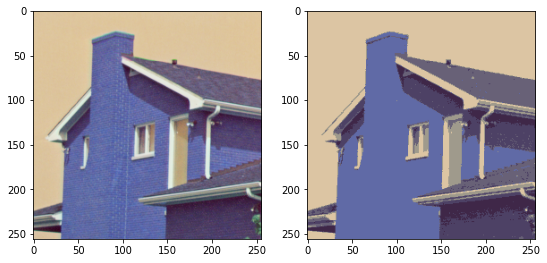

In [12]:
plt.figure(figsize=(9,16))
plt.subplot(1,2,1)
plt.imshow(image,cmap='cividis')
plt.subplot(1,2,2)
plt.imshow(kmeans_image,cmap='cividis')

### 3D Scatter

#### 원본

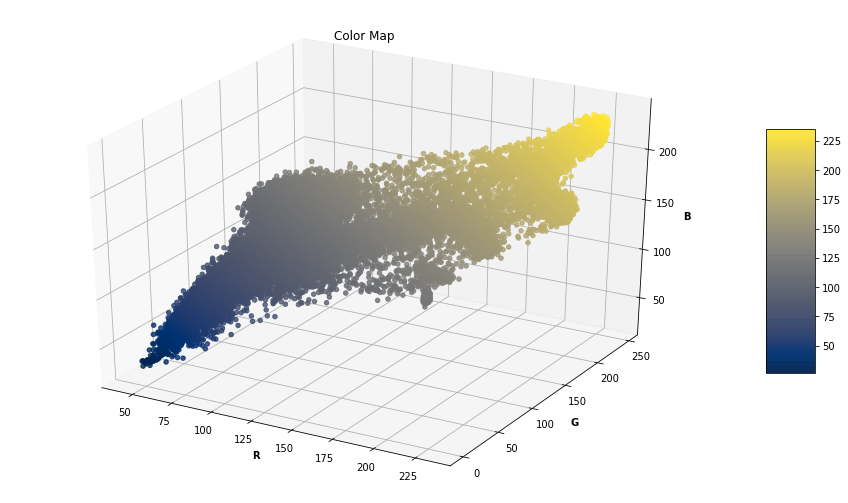

In [18]:
from mpl_toolkits import mplot3d
image1 = np.array(image,dtype='double')
x, y, z = image1[:,:,0],image1[:,:,1],image1[:,:,2]
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection = '3d')

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

sctt = ax.scatter3D(x,y,z,
                    alpha = 0.8,
                    c = (x + y + z)/3,
                    cmap ='cividis',
                    marker ='o')

plt.title("Color Map")
ax.set_xlabel('R', fontweight ='bold')
ax.set_ylabel('G', fontweight ='bold')
ax.set_zlabel('B', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

#### K-means 적용

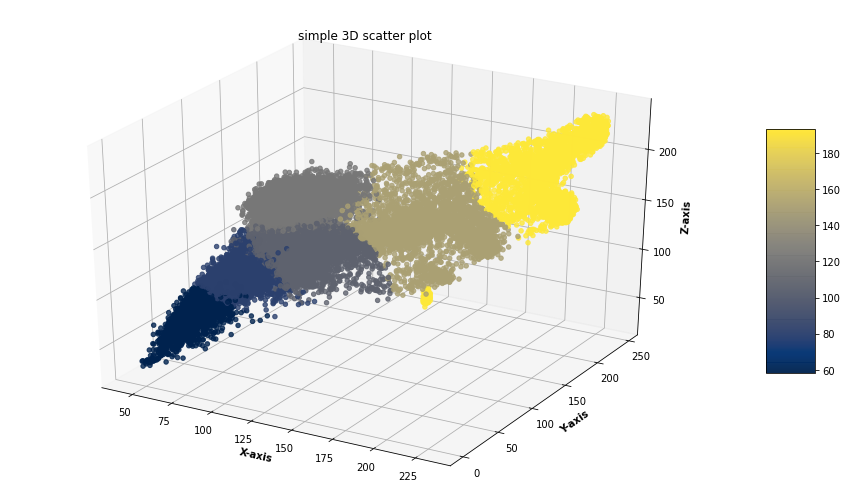

In [21]:
from mpl_toolkits import mplot3d
kmeans_image1 = np.array(kmeans_image,dtype='double')
r, g, b = kmeans_image1[:,:,0],kmeans_image1[:,:,1],kmeans_image1[:,:,2]
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection = '3d')

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

sctt = ax.scatter3D(x,y,z,
                    alpha = 0.8,
                    c = (r + g + b)/3,
                    cmap = 'cividis',
                    marker ='o')

plt.title("K-means Color Map")
ax.set_xlabel('R', fontweight ='bold')
ax.set_ylabel('G', fontweight ='bold')
ax.set_zlabel('B', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)



## Mean shift



In [22]:
def Mean_Shift(image):
    # Window 분할
    distance_sqrt = 3600 # 60**2
    w = np.array([])
    for i in range(4):
        for j in range(4):
            for k in range(4):
                temp = np.array([30+60*i,30+60*j,30+60*k])
                w = np.append(w,temp)
    w = np.reshape(w,(64,3))
    print("초기 Windows 중점 : \n",w)
    col, row = image.shape[0:2]
    k = col*row
    x = image.reshape((k,3)) # R G B만 고려하기 위해 reshape
    x_index = np.zeros((k))
    x_before = np.zeros((k))
    n = 0
    while(True):
        print("\n iteration = ",n)
        # Pixels과 Windows 간의 거리 값으로 군집 배정
        for i in range(k):
            for j in range(w.shape[0]):
                distance = np.sum(((x[i] - w[j])**2)) # 거리 계산(루트 빼고 조건에 제곱한 것을 적용)
                if(distance <= distance_sqrt):
                    x_index[i] = j
                    break;

        # 종료 조건 (군집 index들이 이전 index와 같을 경우 종료)
        if (np.allclose(x_index,x_before)):
            print(w,"\n")
            break;
        x_before = x_index + 0

        # Window 내의 Pixel들의 평균 값으로 중점 이동
        del_list = np.array([],dtype='int64')
        for i in range(w.shape[0]):
            xii = np.where(x_index == i)
            if (np.size(xii[0]) == 0): # 속하는 Pixel이 없는 Window의 경우
                del_list = np.append(del_list,i) # del_list에 저장해두고 continue
                continue;
            w[i,0],w[i,1],w[i,2] = np.average(x[xii[0],0]),np.average(x[xii[0],1]),np.average(x[xii[0],2])
        if (np.size(del_list) > 0): # 삭제할 Windows가 존재할 경우
            del_list = np.sort(del_list)[::-1] # 내림차순 정렬
            for i in range(np.size(del_list)):
                w = np.delete(w,del_list[i],axis=0) # 큰 index 부터 삭제
        print(w,"\n",w.shape)
        n += 1

    # Window 중점 RGB 값으로 군집들 색칠
    x = x.reshape((row,col,3))
    x_index = x_index.reshape((row,col))
    msft_image = image.astype('double')
    for i in range(w.shape[0]):
        xii = np.where(x_index == i)
        for j in range(np.size(xii[0])):
            msft_image[xii[0][j],xii[1][j],0] = w[i,0] # R
            msft_image[xii[0][j],xii[1][j],1] = w[i,1] # G
            msft_image[xii[0][j],xii[1][j],2] = w[i,2] # B
    msft_image = msft_image.astype('uint8')
    return msft_image

### Test 1 (house.bmp)

#### Mean Shift 적용

In [24]:
image = cv2.imread(impath2) #image read
meanshift = Mean_Shift(image)

초기 Windows 중점 : 
 [[ 30.  30.  30.]
 [ 30.  30.  90.]
 [ 30.  30. 150.]
 [ 30.  30. 210.]
 [ 30.  90.  30.]
 [ 30.  90.  90.]
 [ 30.  90. 150.]
 [ 30.  90. 210.]
 [ 30. 150.  30.]
 [ 30. 150.  90.]
 [ 30. 150. 150.]
 [ 30. 150. 210.]
 [ 30. 210.  30.]
 [ 30. 210.  90.]
 [ 30. 210. 150.]
 [ 30. 210. 210.]
 [ 90.  30.  30.]
 [ 90.  30.  90.]
 [ 90.  30. 150.]
 [ 90.  30. 210.]
 [ 90.  90.  30.]
 [ 90.  90.  90.]
 [ 90.  90. 150.]
 [ 90.  90. 210.]
 [ 90. 150.  30.]
 [ 90. 150.  90.]
 [ 90. 150. 150.]
 [ 90. 150. 210.]
 [ 90. 210.  30.]
 [ 90. 210.  90.]
 [ 90. 210. 150.]
 [ 90. 210. 210.]
 [150.  30.  30.]
 [150.  30.  90.]
 [150.  30. 150.]
 [150.  30. 210.]
 [150.  90.  30.]
 [150.  90.  90.]
 [150.  90. 150.]
 [150.  90. 210.]
 [150. 150.  30.]
 [150. 150.  90.]
 [150. 150. 150.]
 [150. 150. 210.]
 [150. 210.  30.]
 [150. 210.  90.]
 [150. 210. 150.]
 [150. 210. 210.]
 [210.  30.  30.]
 [210.  30.  90.]
 [210.  30. 150.]
 [210.  30. 210.]
 [210.  90.  30.]
 [210.  90.  90.]
 [210.  90

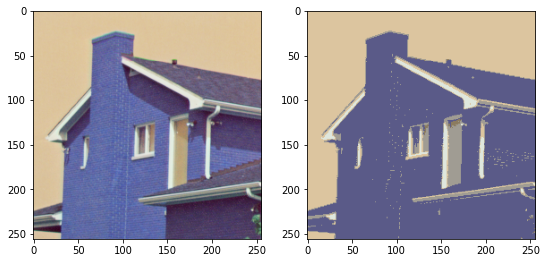

In [25]:
plt.figure(figsize=(9,16))
plt.subplot(1,2,1)
plt.imshow(image,cmap='cividis')
plt.subplot(1,2,2)
plt.imshow(meanshift,cmap='cividis')

#### 3D Scatter



> 원본



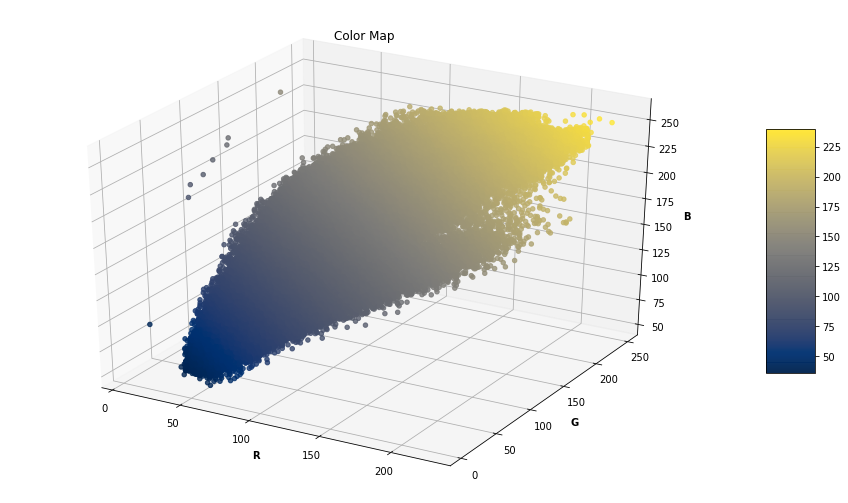

In [36]:
from mpl_toolkits import mplot3d
image1 = np.array(image,dtype='double')
x, y, z = image1[:,:,0],image1[:,:,1],image1[:,:,2]
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection = '3d')

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

sctt = ax.scatter3D(x,y,z,
                    alpha = 0.8,
                    c = (x + y + z)/3,
                    cmap ='cividis',
                    marker ='o')

plt.title("Color Map")
ax.set_xlabel('R', fontweight ='bold')
ax.set_ylabel('G', fontweight ='bold')
ax.set_zlabel('B', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)



> Mean Shift 적용



ValueError: ignored

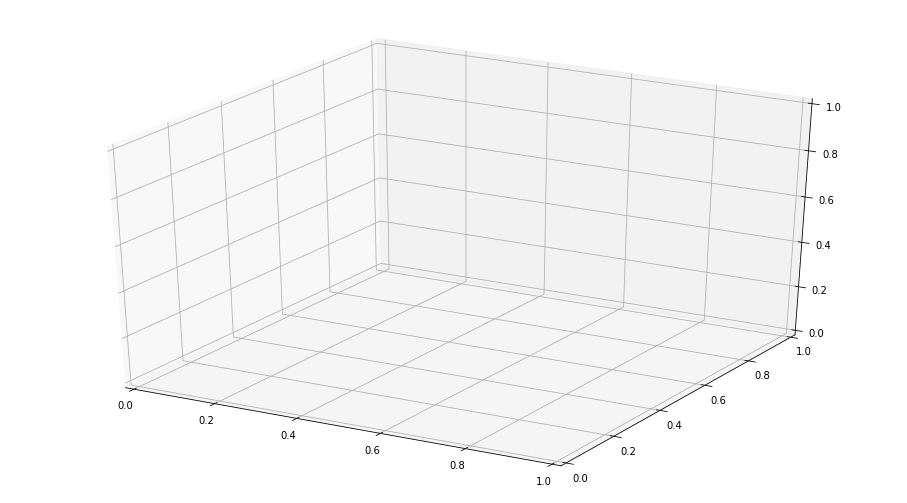

In [37]:
from mpl_toolkits import mplot3d
meanshift1 = np.array(meanshift,dtype='double')
r, g, b = meanshift1[:,:,0],meanshift1[:,:,1],meanshift1[:,:,2]
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection = '3d')

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

sctt = ax.scatter3D(x,y,z,
                    alpha = 0.8,
                    c = (r + g + b)/3,
                    cmap = 'cividis',
                    marker ='o')

plt.title("Mean Shift Color Map")
ax.set_xlabel('R', fontweight ='bold')
ax.set_ylabel('G', fontweight ='bold')
ax.set_zlabel('B', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)



> Windows Center Color



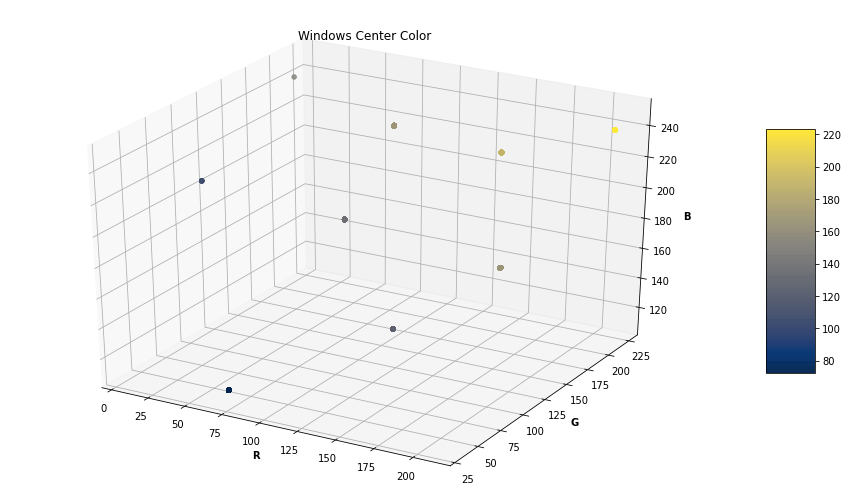

In [38]:
from mpl_toolkits import mplot3d
meanshift4 = np.array(meanshift3,dtype='double')
r, g, b = meanshift4[:,:,0],meanshift4[:,:,1],meanshift4[:,:,2]
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection = '3d')

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

sctt = ax.scatter3D(r,g,b,
                    alpha = 0.8,
                    c = (r + g + b)/3,
                    cmap = 'cividis',
                    marker ='o')

plt.title("Windows Center Color")
ax.set_xlabel('R', fontweight ='bold')
ax.set_ylabel('G', fontweight ='bold')
ax.set_zlabel('B', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

### Test 2 (house.bmp)

### Mean Shift 적용

In [31]:
image3 = cv2.imread(impath) #image read
meanshift3 = Mean_Shift(image3)

초기 Windows 중점 : 
 [[ 30.  30.  30.]
 [ 30.  30.  90.]
 [ 30.  30. 150.]
 [ 30.  30. 210.]
 [ 30.  90.  30.]
 [ 30.  90.  90.]
 [ 30.  90. 150.]
 [ 30.  90. 210.]
 [ 30. 150.  30.]
 [ 30. 150.  90.]
 [ 30. 150. 150.]
 [ 30. 150. 210.]
 [ 30. 210.  30.]
 [ 30. 210.  90.]
 [ 30. 210. 150.]
 [ 30. 210. 210.]
 [ 90.  30.  30.]
 [ 90.  30.  90.]
 [ 90.  30. 150.]
 [ 90.  30. 210.]
 [ 90.  90.  30.]
 [ 90.  90.  90.]
 [ 90.  90. 150.]
 [ 90.  90. 210.]
 [ 90. 150.  30.]
 [ 90. 150.  90.]
 [ 90. 150. 150.]
 [ 90. 150. 210.]
 [ 90. 210.  30.]
 [ 90. 210.  90.]
 [ 90. 210. 150.]
 [ 90. 210. 210.]
 [150.  30.  30.]
 [150.  30.  90.]
 [150.  30. 150.]
 [150.  30. 210.]
 [150.  90.  30.]
 [150.  90.  90.]
 [150.  90. 150.]
 [150.  90. 210.]
 [150. 150.  30.]
 [150. 150.  90.]
 [150. 150. 150.]
 [150. 150. 210.]
 [150. 210.  30.]
 [150. 210.  90.]
 [150. 210. 150.]
 [150. 210. 210.]
 [210.  30.  30.]
 [210.  30.  90.]
 [210.  30. 150.]
 [210.  30. 210.]
 [210.  90.  30.]
 [210.  90.  90.]
 [210.  90

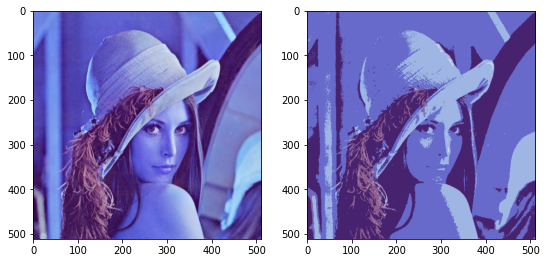

In [32]:
plt.figure(figsize=(9,16))
plt.subplot(1,2,1)
plt.imshow(image3,cmap='cividis')
plt.subplot(1,2,2)
plt.imshow(meanshift3,cmap='cividis')

#### 3D Scatter



> 원본



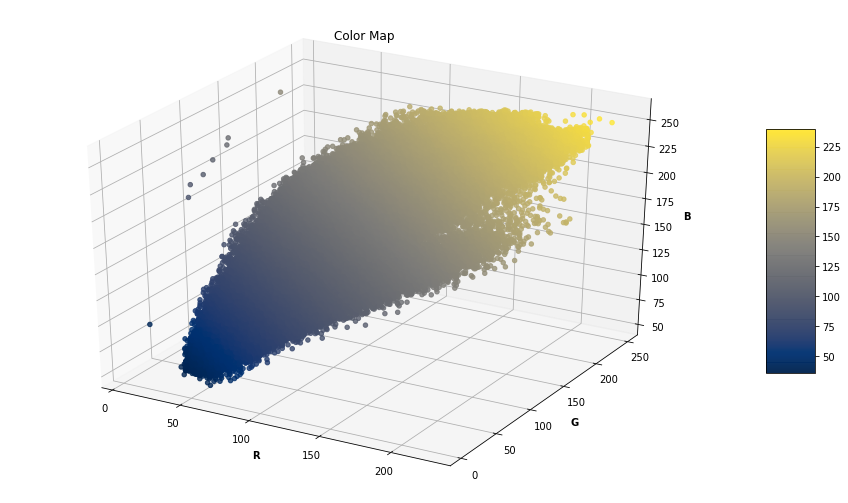

In [33]:
from mpl_toolkits import mplot3d
image4 = np.array(image3,dtype='double')
x, y, z = image4[:,:,0],image4[:,:,1],image4[:,:,2]
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection = '3d')

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

sctt = ax.scatter3D(x,y,z,
                    alpha = 0.8,
                    c = (x + y + z)/3,
                    cmap ='cividis',
                    marker ='o')

plt.title("Color Map")
ax.set_xlabel('R', fontweight ='bold')
ax.set_ylabel('G', fontweight ='bold')
ax.set_zlabel('B', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)



> Mean Shift 적용



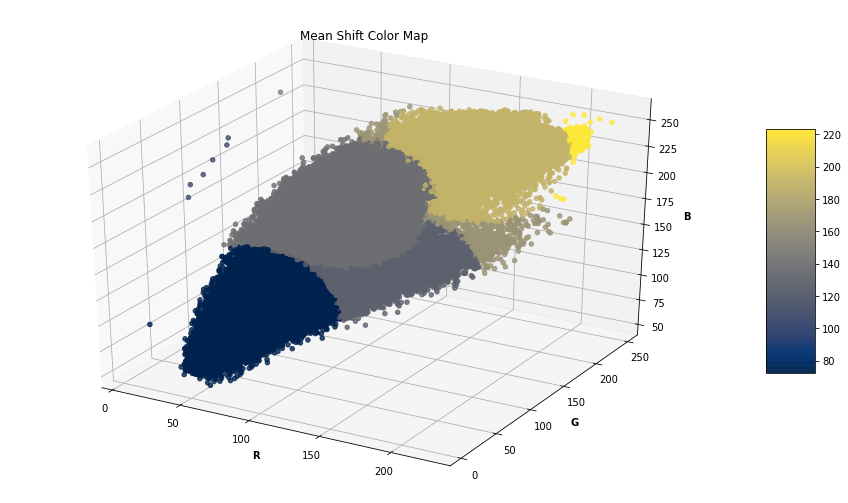

In [34]:
from mpl_toolkits import mplot3d
meanshift4 = np.array(meanshift3,dtype='double')
r, g, b = meanshift4[:,:,0],meanshift4[:,:,1],meanshift4[:,:,2]
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection = '3d')

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

sctt = ax.scatter3D(x,y,z,
                    alpha = 0.8,
                    c = (r + g + b)/3,
                    cmap = 'cividis',
                    marker ='o')

plt.title("Mean Shift Color Map")
ax.set_xlabel('R', fontweight ='bold')
ax.set_ylabel('G', fontweight ='bold')
ax.set_zlabel('B', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)



> Windows Center Color



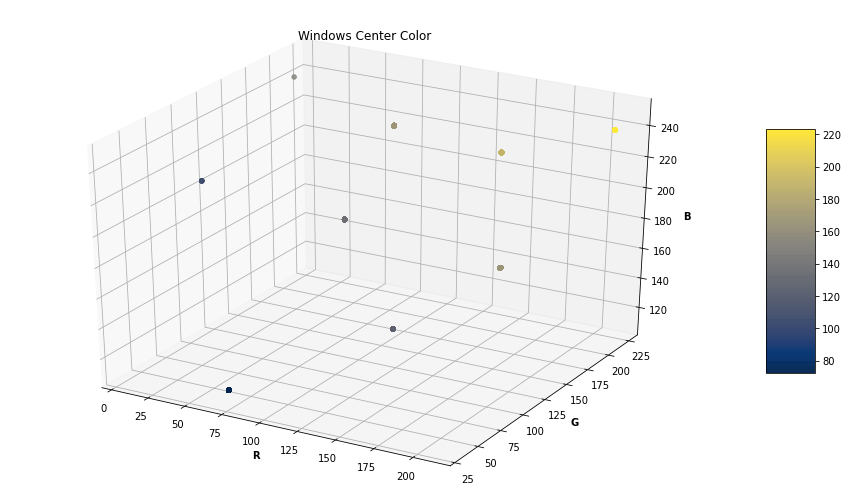

In [35]:
from mpl_toolkits import mplot3d
meanshift4 = np.array(meanshift3,dtype='double')
r, g, b = meanshift4[:,:,0],meanshift4[:,:,1],meanshift4[:,:,2]
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection = '3d')

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

sctt = ax.scatter3D(r,g,b,
                    alpha = 0.8,
                    c = (r + g + b)/3,
                    cmap = 'cividis',
                    marker ='o')

plt.title("Windows Center Color")
ax.set_xlabel('R', fontweight ='bold')
ax.set_ylabel('G', fontweight ='bold')
ax.set_zlabel('B', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
























# **2. (Local Descriptor) Based on the descriptor designed in FL class, design the followings.**

## MNIST Dataset Load

In [39]:
import sklearn.datasets as dataset
mnist = dataset.fetch_openml('mnist_784')

In [40]:
mnist_data = mnist.data
mnist_target = mnist.target
print('mnist data shape : ',mnist_data.shape)
print('mnist target shape : ',mnist_target.shape)

mnist data shape :  (70000, 784)
mnist target shape :  (70000,)




## 1) Apply k-means (k=10) algorithm to MNIST test dataset, where input dimension is 28^2=784.



In [176]:
def mnist_kmeans(mnist_data,k):
    np.set_printoptions(threshold=100,linewidth=100)
    n,dimention = mnist_data.shape
    x = mnist_data + 0
    z = np.zeros((k,dimention),dtype='int') # k centroids
    for i in range(k):
        rand = np.random.randint(0,n)
        z[i,:] = x[rand,:] # 초기화
    print("초기",dimention,"차원 군집 대표 선정\n")
    x_index = np.zeros(n)
    x_before = np.zeros(n)
    distance = np.zeros(k)
    a = 0
    
    # 반복문 시작 (수렴이 안되서 iteration으로 수행)
    for iteration in range(250):
        print("\niteration : ",a)
        # 각 픽셀과 모든 군집 간 거리 구하고 최소 거리의 군집에 할당
        for i in range(n):
            for j in range(k):
                distance[j] = np.sum(np.abs((x[i,:] - z[j,:]))) # 거리 계산
            x_index[i] = np.argmin(distance) # 최소 거리를 해당 군집으로 배정
        #이전과 똑같으면 종료
        if (np.allclose(x_index,x_before)):
            break;
        x_before = x_index + 0

        # mean값 구하고 군집 이동
        for i in range(k):
            xii = np.where(x_index == i)
            if (np.size(xii) == 0):
                continue
            for j in range(dimention):
                z[0,j] = np.average(x[xii[0],j])
        a = a+1
    return x_index

In [223]:
index = mnist_kmeans(mnist_data[60000:70000],10)
print(index)

초기 784 차원 군집 대표 선정


iteration :  0

iteration :  1

iteration :  2

iteration :  3

iteration :  4

iteration :  5

iteration :  6

iteration :  7

iteration :  8

iteration :  9

iteration :  10

iteration :  11

iteration :  12

iteration :  13

iteration :  14

iteration :  15

iteration :  16

iteration :  17

iteration :  18

iteration :  19

iteration :  20

iteration :  21

iteration :  22

iteration :  23

iteration :  24

iteration :  25

iteration :  26

iteration :  27

iteration :  28

iteration :  29

iteration :  30

iteration :  31

iteration :  32

iteration :  33

iteration :  34

iteration :  35

iteration :  36

iteration :  37

iteration :  38

iteration :  39

iteration :  40

iteration :  41

iteration :  42

iteration :  43

iteration :  44

iteration :  45

iteration :  46

iteration :  47

iteration :  48

iteration :  49

iteration :  50

iteration :  51

iteration :  52

iteration :  53

iteration :  54

iteration :  55

iteration :  56

iteration :  57

ite



## 2) Measure the clustering accuracy by counting the number of incorrectly grouped images, and analyze the results.



### 10000개 data 중 각 숫자들의 개수 파악

In [46]:
target = np.zeros(10)
for i in range(10000):
    target[int(mnist_target[60000+i])] += 1
print(target)

[ 980. 1135. 1032. 1010.  982.  892.  958. 1028.  974. 1009.]


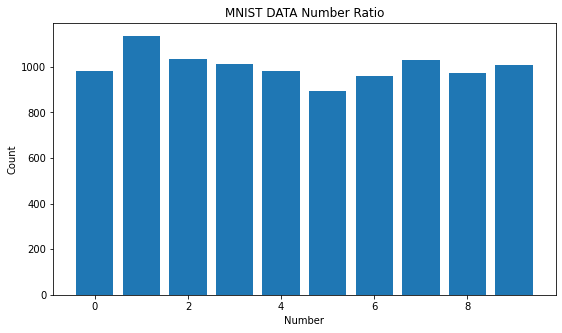

In [52]:
xx = np.arange(10)
plt.figure(figsize=(9,5))
plt.bar(xx, target)
plt.title('MNIST DATA Number Ratio')
plt.xlabel('Number')
plt.ylabel('Count')
plt.show()

### Accuracy 측정

In [224]:
accuracy = 0
y = np.zeros((10,10))
total = np.zeros(10)
fail = np.zeros(10)
for i in range(10):
    num = np.zeros(10)
    index_i = np.array(np.where(index == i))
    total[i] = np.size(index_i)
    print("군집",i,"에 속한 개수 : ",total[i])
    for j in range(np.size(index_i)):
        y[i,int(mnist_target[60000+index_i[0,j]])] += 1
    print(y[i])
    accuracy += total[i] - np.max(y[i])
    fail[i] = total[i] - np.max(y[i])
    print("군집 틀린 갯수 : ",fail[i],"\n")
print("군집 실패 비율 : ",int(accuracy),"/ 10000 = ",np.round(accuracy/10000 *100,2), "%")

군집 0 에 속한 개수 :  517.0
[ 72.   0.   1.   2. 219.   5.  63.  15.  18. 122.]
군집 틀린 갯수 :  298.0 

군집 1 에 속한 개수 :  941.0
[ 57.   1. 149.   5.  82.  18. 588.   0.  34.   7.]
군집 틀린 갯수 :  353.0 

군집 2 에 속한 개수 :  1314.0
[ 82.   0.  21.  25. 149.  21.   1. 580.  90. 345.]
군집 틀린 갯수 :  734.0 

군집 3 에 속한 개수 :  364.0
[ 19.   0. 270.  36.   2.   0.   6.   8.  21.   2.]
군집 틀린 갯수 :  94.0 

군집 4 에 속한 개수 :  1920.0
[319.   0.  26. 281. 120. 397.  18. 119. 357. 283.]
군집 틀린 갯수 :  1523.0 

군집 5 에 속한 개수 :  354.0
[ 52.   2. 202.  37.   0.   4.  15.   1.  40.   1.]
군집 틀린 갯수 :  152.0 

군집 6 에 속한 개수 :  945.0
[201.   2.  46. 408.   3. 155.  59.   1.  63.   7.]
군집 틀린 갯수 :  537.0 

군집 7 에 속한 개수 :  1869.0
[ 30. 667. 231. 121. 224.  81.  41. 170. 216.  88.]
군집 틀린 갯수 :  1202.0 

군집 8 에 속한 개수 :  1259.0
[ 35. 463.  82.  66. 139. 122.  60. 113.  86.  93.]
군집 틀린 갯수 :  796.0 

군집 9 에 속한 개수 :  517.0
[113.   0.   4.  29.  44.  89. 107.  21.  49.  61.]
군집 틀린 갯수 :  404.0 

군집 실패 비율 :  6093 / 10000 =  60.93 %


군집화 비율

In [225]:
print(total)

[ 517.  941. 1314.  364. 1920.  354.  945. 1869. 1259.  517.]


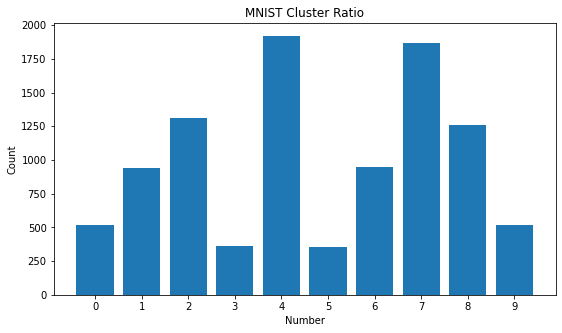

In [226]:
plt.figure(figsize=(9,5))
plt.bar(xx, total)
plt.xticks(xx,xx)
plt.title('MNIST Cluster Ratio')
plt.xlabel('Number')
plt.ylabel('Count')
plt.show()

군집화 각 개수

In [227]:
print(y)

[[ 72.   0.   1.   2. 219.   5.  63.  15.  18. 122.]
 [ 57.   1. 149.   5.  82.  18. 588.   0.  34.   7.]
 [ 82.   0.  21.  25. 149.  21.   1. 580.  90. 345.]
 [ 19.   0. 270.  36.   2.   0.   6.   8.  21.   2.]
 [319.   0.  26. 281. 120. 397.  18. 119. 357. 283.]
 [ 52.   2. 202.  37.   0.   4.  15.   1.  40.   1.]
 [201.   2.  46. 408.   3. 155.  59.   1.  63.   7.]
 [ 30. 667. 231. 121. 224.  81.  41. 170. 216.  88.]
 [ 35. 463.  82.  66. 139. 122.  60. 113.  86.  93.]
 [113.   0.   4.  29.  44.  89. 107.  21.  49.  61.]]


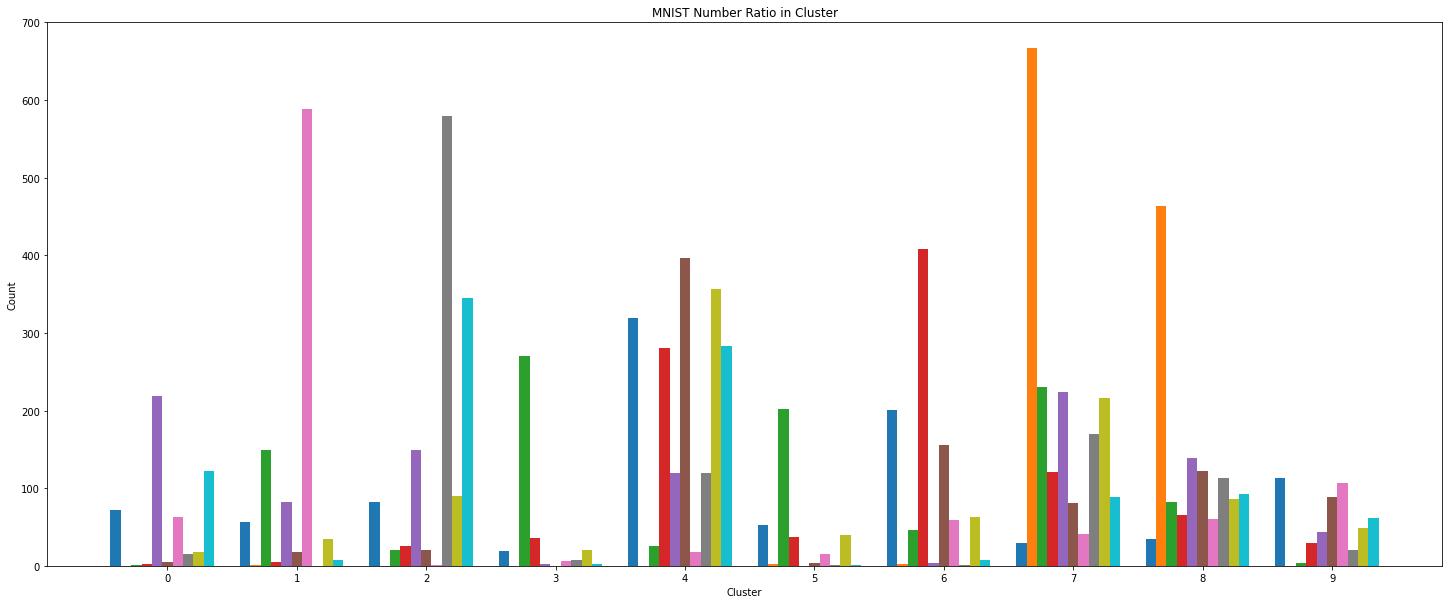

In [229]:
yt = np.transpose(y)
plt.figure(figsize=(25,10))
for i in range(10):
    plt.bar(xx-0.4+(0.08*i),yt[i],width=0.08,label=i)
plt.xticks(xx,xx)
plt.title('MNIST Number Ratio in Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

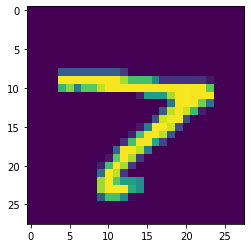

In [140]:
index_4 = np.array(np.where(index == 4))
plt.imshow(np.reshape(mnist_data[60000+index_4[0,11]],(28,28)))

군집화 틀린 개수

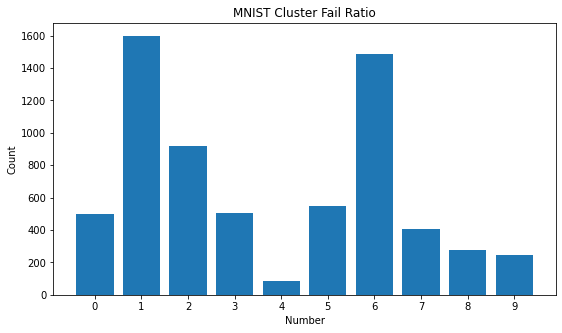

In [102]:
plt.figure(figsize=(9,5))
plt.bar(xx, fail)
plt.xticks(xx,xx)
plt.title('MNIST Cluster Fail Ratio')
plt.xlabel('Number')
plt.ylabel('Count')
plt.show()

## Sobel gradient

In [142]:
def sobel_gradient_dx(image):
    mx = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])   #sobel filter dx
    col, row = image.shape
    image = np.pad(image,1 ,'reflect')  #convolution을 위해 image padding
    dx = np.zeros((col,row))
    for i in range(col):
        for j in range(row):
            dx[i][j] = np.sum(image[i:i+3,j:j+3]*mx) #convolution
    return dx

def sobel_gradient_dy(image):
    my = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]]) #sobel filter dy
    col, row = image.shape
    image = np.pad(image,1,'reflect')  #convolution을 위해 image padding
    dy = np.zeros((col,row))
    for i in range(col):
        for j in range(row):
            dy[i][j] = np.sum(image[i:i+3,j:j+3]*my)   #convolution
    return dy

def orientation(image):
    dx = sobel_gradient_dx(image)
    dy = sobel_gradient_dy(image)
    arc = np.arctan2(dy,dx) # arctan(dy/dx)
    arc = arc * 180/math.pi
    arc = np.where(arc < 0,360+arc,arc)
    return arc

def strength(image):
    dx = sobel_gradient_dx(image)
    dy = sobel_gradient_dy(image)
    mag = np.sqrt(dx**2+dy**2)   #구하는 식         
    return mag

## 3) Divide the input 28×28 image into four 14×14 sub-blocks, and compute the histogram of orientations for each sub-block

In [143]:
mnist28 = mnist_data.reshape(70000,28,28)
mnist_test = mnist28[60000:]
hist_y = np.zeros((10000,4,8)) # 0 45 90 135 180 225 270 315
for k in range(10000):
    mnist_up,mnist_down = np.vsplit(mnist_test[k],[14])
    mnist_a, mnist_b = np.array(np.hsplit(mnist_up,[14]))
    mnist_c, mnist_d = np.array(np.hsplit(mnist_down,[14]))
    # 각 14x14 image의 orientation 및 magnitude 값 계산
    ori = np.array([orientation(mnist_a),orientation(mnist_b),orientation(mnist_c),orientation(mnist_d)])
    mag = np.array([strength(mnist_a),strength(mnist_b),strength(mnist_c),strength(mnist_d)])
    hist_x = np.array([0, 45, 90, 135, 180, 225, 270, 315])
    for n in range(4):
        for i in range(14):
            for j in range(14):
                temp = np.abs(hist_x - ori[n,i,j]) # Quantization (가까운 값으로 반올림)
                minarg = np.argmin(temp)
                hist_y[k,n,minarg] += mag[n,i,j] # 해당하는 방향 값에 크기 값으로 축적
print(hist_y.shape)

(10000, 4, 8)


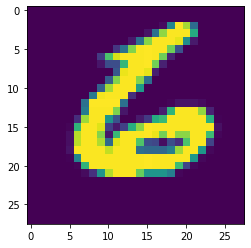

In [158]:
plt.imshow(mnist_test[9999])

[[    0  1902 11796   195     0     0 11583  3473]
 [ 2664  3073 11313  3032  6833  2470  7384  1719]
 [ 2909  9335  2032     0   472  1537  2516  1291]
 [ 4324  2794  1896     0  3134 13457  1896   164]]


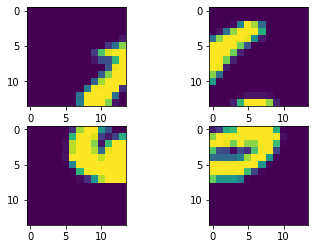

In [154]:
hist_y = np.array(hist_y,dtype='int') # 소수점 아래 값 버림
plt.subplot(2,2,1)
plt.imshow(mnist_a)
plt.subplot(2,2,2)
plt.imshow(mnist_b)
plt.subplot(2,2,3)
plt.imshow(mnist_c)
plt.subplot(2,2,4)
plt.imshow(mnist_d)
print(hist_y[0])
# print(hist_y)
hist_y_flat = np.reshape(hist_y,(10000,32)) # 4*8을 32로 flatten

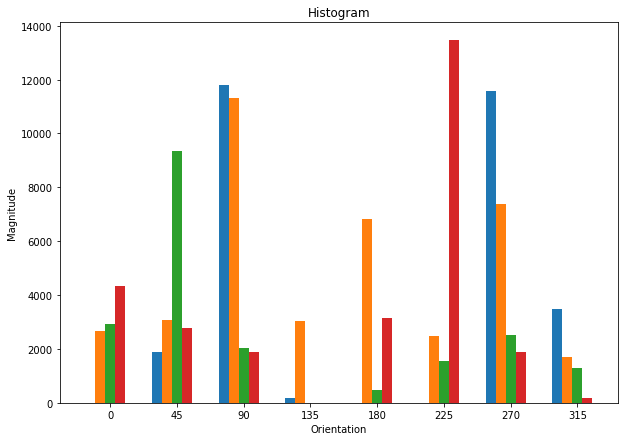

In [199]:
xxx = np.arange(8)
plt.figure(figsize=(10,7))
for i in range(4):
    plt.bar(xx-0.3+(0.15*i), np.array(hist_y[0,i],dtype='int'),width=0.15)
plt.xticks(xxx,hist_x)
plt.title('Histogram')
plt.xlabel('Orientation')
plt.ylabel('Magnitude')
plt.show()

## 4) Apply k-means (k=10) algorithm again using feature, where input dimension is 8×4=32

In [177]:
feature = mnist_kmeans(hist_y_flat,10)

초기 32 차원 군집 대표 선정


iteration :  0

iteration :  1

iteration :  2

iteration :  3

iteration :  4

iteration :  5

iteration :  6

iteration :  7

iteration :  8

iteration :  9

iteration :  10

iteration :  11

iteration :  12

iteration :  13

iteration :  14

iteration :  15

iteration :  16

iteration :  17

iteration :  18

iteration :  19

iteration :  20

iteration :  21

iteration :  22

iteration :  23

iteration :  24

iteration :  25

iteration :  26

iteration :  27

iteration :  28

iteration :  29

iteration :  30

iteration :  31

iteration :  32

iteration :  33

iteration :  34

iteration :  35

iteration :  36

iteration :  37

iteration :  38

iteration :  39

iteration :  40

iteration :  41

iteration :  42

iteration :  43

iteration :  44

iteration :  45

iteration :  46

iteration :  47

iteration :  48

iteration :  49

iteration :  50

iteration :  51

iteration :  52

iteration :  53

iteration :  54

iteration :  55

iteration :  56

iteration :  57

iter

In [195]:
accuracy = 0
y = np.zeros((10,10))
total = np.zeros(10)
fail = np.zeros(10)
for i in range(10):
    num = np.zeros(10)
    index_i = np.array(np.where(feature == i))
    total[i] = np.size(index_i)
    print("군집",i,"에 속한 개수 : ",total[i])
    for j in range(np.size(index_i)):
        y[i,int(mnist_target[60000+index_i[0,j]])] += 1
    print(y[i])
    accuracy += total[i] - np.max(y[i])
    fail[i] = total[i] - np.max(y[i])
    print("군집 틀린 갯수 : ",fail[i],"\n")
print("군집 실패 비율 : ",int(accuracy),"/ 10000 = ",np.round(accuracy/10000 *100,2), "%")

군집 0 에 속한 개수 :  1323.0
[890.   0.  27.  72.   1.  48. 201.  11.  51.  22.]
군집 틀린 갯수 :  433.0 

군집 1 에 속한 개수 :  1299.0
[  1. 198.  66. 131. 109. 139.  18. 252. 104. 281.]
군집 틀린 갯수 :  1018.0 

군집 2 에 속한 개수 :  473.0
[  0.   0.   3.   8.   0. 428.   0.   3.  30.   1.]
군집 틀린 갯수 :  45.0 

군집 3 에 속한 개수 :  1010.0
[  4.   0. 400. 334.   0.  10.   0. 240.  17.   5.]
군집 틀린 갯수 :  610.0 

군집 4 에 속한 개수 :  688.0
[  4. 343.  44.   1.  78.   4.  27. 117.  54.  16.]
군집 틀린 갯수 :  345.0 

군집 5 에 속한 개수 :  2534.0
[ 17. 592. 172. 174. 456.  95. 224. 227. 392. 185.]
군집 틀린 갯수 :  1942.0 

군집 6 에 속한 개수 :  580.0
[  7.   0.   5.  71. 143.  21.   7.  36.   4. 286.]
군집 틀린 갯수 :  294.0 

군집 7 에 속한 개수 :  885.0
[ 14.   1. 166.  71.  59.  68. 415.  11.  78.   2.]
군집 틀린 갯수 :  470.0 

군집 8 에 속한 개수 :  506.0
[  0.   0.  89. 126.   0.  70.   1.  20. 197.   3.]
군집 틀린 갯수 :  309.0 

군집 9 에 속한 개수 :  702.0
[ 43.   1.  60.  22. 136.   9.  65. 111.  47. 208.]
군집 틀린 갯수 :  494.0 

군집 실패 비율 :  5960 / 10000 =  59.6 %


군집화 비율

In [201]:
print(total)

[1323. 1299.  473. 1010.  688. 2534.  580.  885.  506.  702.]


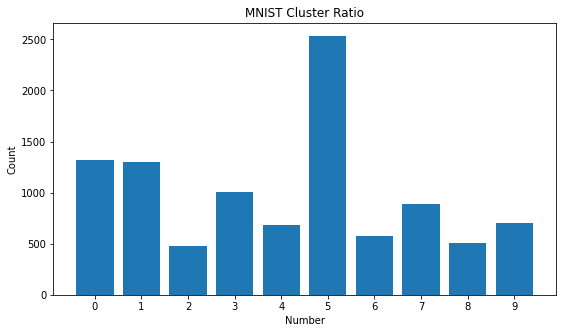

In [200]:
xx = np.arange(10)
plt.figure(figsize=(9,5))
plt.bar(xx, total)
plt.xticks(xx,xx)
plt.title('MNIST Cluster Ratio')
plt.xlabel('Number')
plt.ylabel('Count')
plt.show()

각 군집 내의 숫자들의 개수

In [208]:
print(y)

[[890.   0.  27.  72.   1.  48. 201.  11.  51.  22.]
 [  1. 198.  66. 131. 109. 139.  18. 252. 104. 281.]
 [  0.   0.   3.   8.   0. 428.   0.   3.  30.   1.]
 [  4.   0. 400. 334.   0.  10.   0. 240.  17.   5.]
 [  4. 343.  44.   1.  78.   4.  27. 117.  54.  16.]
 [ 17. 592. 172. 174. 456.  95. 224. 227. 392. 185.]
 [  7.   0.   5.  71. 143.  21.   7.  36.   4. 286.]
 [ 14.   1. 166.  71.  59.  68. 415.  11.  78.   2.]
 [  0.   0.  89. 126.   0.  70.   1.  20. 197.   3.]
 [ 43.   1.  60.  22. 136.   9.  65. 111.  47. 208.]]


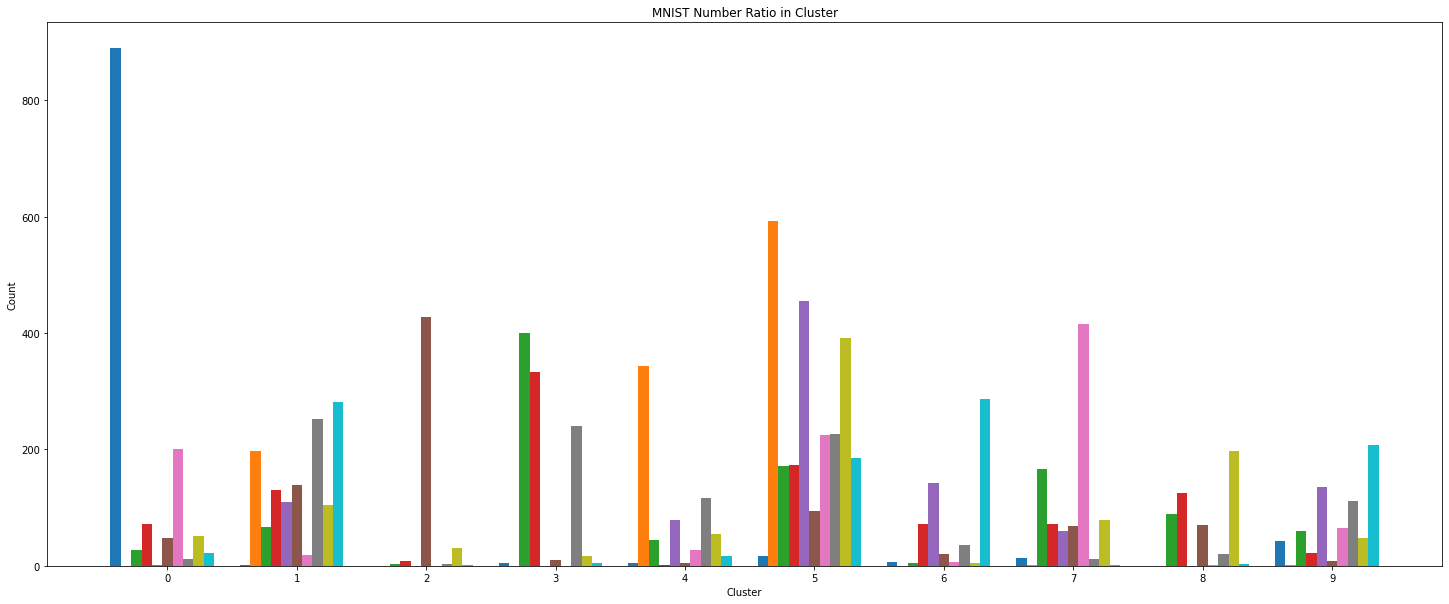

In [219]:
yt = np.transpose(y)
plt.figure(figsize=(25,10))
for i in range(10):
    plt.bar(xx-0.4+(0.08*i),yt[i],width=0.08)
plt.xticks(xx,xx)
plt.title('MNIST Number Ratio in Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# **3. (Back propagation) Design the simple single-layer perceptron (SLP) network for IRIS dataset.**

## 1) Use python library to extract images, and separate them into test and training set.

### IRIS Dataset Load

In [230]:
import sklearn.datasets as dataset
iris = dataset.load_iris()

In [231]:
iris_data = iris.data
iris_target = iris.target
print('iris data shape : ', iris_data.shape)
print('iris target shape : ', iris_target.shape)

iris data shape :  (150, 4)
iris target shape :  (150,)


### 1),2) Select any two datasets and Separate test and training set

In [238]:
# 두 가지 구분 (setosa, versicolor (virginica는 무시))
iris1 = iris.data[:50] # setosa
iris2 = iris.data[50:100] # versicolor

# Train/Test Separate (100개중 80개는 train 20개는 test)
iris_trainsize = 40 
iris_testsize = 10

iris_train = np.zeros([2 * iris_trainsize, 5])
iris_train[:iris_trainsize, :4] = iris1[:iris_trainsize] # setosa 40개 
iris_train[iris_trainsize:, :4] = iris2[:iris_trainsize] # versicolor 40개
iris_train[:iris_trainsize,4] = 1
iris_train[iris_trainsize:,4] = -1

iris_test = np.zeros([2 * iris_testsize, 5])
iris_test[:iris_testsize, :4] = iris1[iris_trainsize:] # setosa 10개 
iris_test[iris_testsize:, :4] = iris2[iris_trainsize:] # versicolor 10개
iris_test[:iris_testsize,4] = 1
iris_test[iris_testsize:,4] = -1

print("iris_train shape :",iris_train.shape)
print("iris_test shape : ",iris_test.shape)

iris_train shape : (80, 5)
iris_test shape :  (20, 5)


## 3) Design SLP network to classify them. Use the sigmoid function for activation function

In [285]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))
# SLP Class
class SLP:
    def __init__(self, size):
        self.weight = np.random.rand(size,1)
        self.bias = 1

    def forward(self, input):
        output = input @ self.weight + self.bias # Forward 공식
        output = sigmoid(output) # Sigmoid
        if output > 0.5 :
            y = 1
        else :
            y = -1
        return y

    def backprop(self, ans, x, lr):
        for k in range(len(x)):
            self.weight[k] += lr * ans * x[k] # Weight Update

## 4) 5) Use the back propagation method to train the network parameters and Compute the training and test error for every epoch.

In [298]:
lr = 0.0005 # learning rate
epochs = 100 # epochs
model = SLP(4) # SLP 객체 생성(model)

accuracy= np.zeros([epochs])
for epoch in range(epochs):
    acc = 0.0
    np.random.shuffle(iris_train)
    for i in range(len(iris_train)):
        y = model.forward(iris_train[i, 0:4])
        if y != iris_train[i, 4]: #
            model.backprop(iris_train[i, 4], iris_train[i, 0:4], lr)
        else: acc += 1 # 맞았다면 정확도++

    accuracy[epoch] = acc / len(iris_train)
    print("Epoch",epoch,"/",epochs,"   ","Accuracy",accuracy[epoch])

Epoch 0 / 100     Accuracy 0.5
Epoch 1 / 100     Accuracy 0.5
Epoch 2 / 100     Accuracy 0.5
Epoch 3 / 100     Accuracy 0.5
Epoch 4 / 100     Accuracy 0.5
Epoch 5 / 100     Accuracy 0.375
Epoch 6 / 100     Accuracy 0.025
Epoch 7 / 100     Accuracy 0.1375
Epoch 8 / 100     Accuracy 0.175
Epoch 9 / 100     Accuracy 0.2375
Epoch 10 / 100     Accuracy 0.4125
Epoch 11 / 100     Accuracy 0.575
Epoch 12 / 100     Accuracy 0.675
Epoch 13 / 100     Accuracy 0.775
Epoch 14 / 100     Accuracy 0.8
Epoch 15 / 100     Accuracy 0.8125
Epoch 16 / 100     Accuracy 0.875
Epoch 17 / 100     Accuracy 0.8875
Epoch 18 / 100     Accuracy 0.925
Epoch 19 / 100     Accuracy 0.9
Epoch 20 / 100     Accuracy 0.9
Epoch 21 / 100     Accuracy 0.925
Epoch 22 / 100     Accuracy 0.9375
Epoch 23 / 100     Accuracy 0.925
Epoch 24 / 100     Accuracy 0.9375
Epoch 25 / 100     Accuracy 0.9375
Epoch 26 / 100     Accuracy 0.925
Epoch 27 / 100     Accuracy 0.95
Epoch 28 / 100     Accuracy 0.95
Epoch 29 / 100     Accuracy 0.95
E

## Plot and Test Dataset

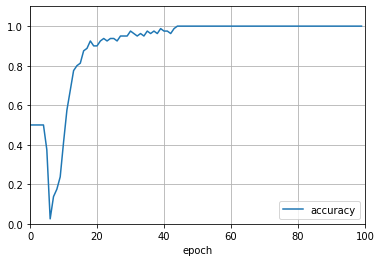

In [299]:
plt.plot(range(epochs), accuracy, label='accuracy')
plt.xlabel("epoch"); plt.legend(loc = 'lower right'); plt.axis([0,epochs,0,1.1]); plt.grid(1)

In [301]:
accuracy= np.zeros([epochs])
for epoch in range(epochs):
    acc = 0.0
    np.random.shuffle(iris_test)
    for i in range(len(iris_test)):
        y = model.forward(iris_test[i, 0:4])
        if y != iris_test[i, 4]: #
            model.backprop(iris_test[i, 4], iris_test[i, 0:4], lr)
        else: acc += 1 # 맞았다면 정확도++

    accuracy[epoch] = acc / len(iris_test)
    print("Epoch",epoch,"/",epochs,"   ","Accuracy",accuracy[epoch])

Epoch 0 / 100     Accuracy 1.0
Epoch 1 / 100     Accuracy 1.0
Epoch 2 / 100     Accuracy 1.0
Epoch 3 / 100     Accuracy 1.0
Epoch 4 / 100     Accuracy 1.0
Epoch 5 / 100     Accuracy 1.0
Epoch 6 / 100     Accuracy 1.0
Epoch 7 / 100     Accuracy 1.0
Epoch 8 / 100     Accuracy 1.0
Epoch 9 / 100     Accuracy 1.0
Epoch 10 / 100     Accuracy 1.0
Epoch 11 / 100     Accuracy 1.0
Epoch 12 / 100     Accuracy 1.0
Epoch 13 / 100     Accuracy 1.0
Epoch 14 / 100     Accuracy 1.0
Epoch 15 / 100     Accuracy 1.0
Epoch 16 / 100     Accuracy 1.0
Epoch 17 / 100     Accuracy 1.0
Epoch 18 / 100     Accuracy 1.0
Epoch 19 / 100     Accuracy 1.0
Epoch 20 / 100     Accuracy 1.0
Epoch 21 / 100     Accuracy 1.0
Epoch 22 / 100     Accuracy 1.0
Epoch 23 / 100     Accuracy 1.0
Epoch 24 / 100     Accuracy 1.0
Epoch 25 / 100     Accuracy 1.0
Epoch 26 / 100     Accuracy 1.0
Epoch 27 / 100     Accuracy 1.0
Epoch 28 / 100     Accuracy 1.0
Epoch 29 / 100     Accuracy 1.0
Epoch 30 / 100     Accuracy 1.0
Epoch 31 / 100    

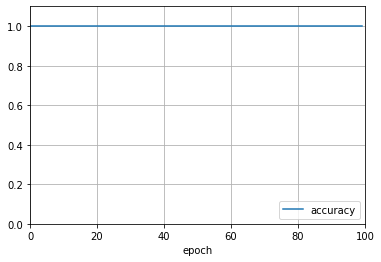

In [297]:
plt.plot(range(epochs), accuracy, label='accuracy')
plt.xlabel("epoch"); plt.legend(loc = 'lower right'); plt.axis([0,epochs,0,1.1]); plt.grid(1)